<a href="https://colab.research.google.com/github/Dwarkamoye/Python-CS5590-490-0001/blob/master/Deep_Learning_6/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Using TensorFlow backend.
W0723 17:48:18.221676 140181334357888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 17:48:18.271124 140181334357888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 17:48:18.285340 140181334357888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 17:48:18.379839 140181334357888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 17:48:18.438714 14018133

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.5312 - val_loss: 0.4602
Epoch 2/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.4283 - val_loss: 0.4081
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.3976 - val_loss: 0.3905
Epoch 4/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3810 - val_loss: 0.3748
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3665 - val_loss: 0.3620


In [2]:
#Ading one hidden layer

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#first = Dense(256, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(first)
#first_2 = Dense(256, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(784, activation='sigmoid')(first_2)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4967 - acc: 0.4544 - val_loss: 0.4014 - val_acc: 0.4890
Epoch 2/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.3836 - acc: 0.4917 - val_loss: 0.3730 - val_acc: 0.4930
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.3680 - acc: 0.4945 - val_loss: 0.3611 - val_acc: 0.4923
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.3542 - acc: 0.4976 - val_loss: 0.3467 - val_acc: 0.5002
Epoch 5/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3406 - acc: 0.5002 - val_loss: 0.3341 - val_acc: 0.4982


In [0]:
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

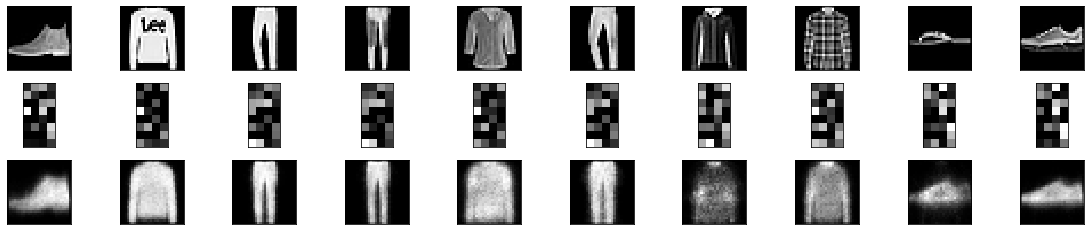

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

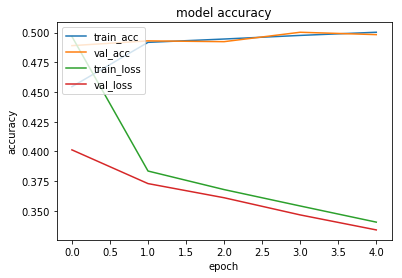

In [5]:

from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()